# All-sky H$\alpha$ Map

Figure 1.9 from Chapter 1 of *Interstellar and Intergalactic Medium* by Ryden & Pogge, 2021, 
Cambridge University Press.

Plots a Mollweide projection of the Finkbeiner
[2003 ApJS, 146, 407](https://ui.adsabs.harvard.edu/abs/2003ApJS..146..407F/abstract) 
all-sky H$\alpha$ emission line map.

Finkbeiner 2003 assembled a full sky Halpha map using data from three surveys: the Wisconsin H-Alpha Mapper 
(WHAM), the Virginia Tech Spectral-Line Survey (VTSS), and the Southern H-Alpha Sky Survey Atlas (SHASSA). 
The units are surface brightness in Rayleighs.

We are using the map in FITS HEALPix format from the NASA Goddard Space Flight Center's
[Legacy Archive for Microwave Background Data Analysis (LAMBDA)](https://lambda.gsfc.nasa.gov).
 
 * [Composite all-sky H-alpha (Finkbeiner) map](https://lambda.gsfc.nasa.gov/product/foreground/fg_halpha_map.cfm).

### Requirements

This notebook requires that your computer has the [healpy package](https://healpy.readthedocs.io/en/latest/)
installed.

The image `Halpha_fwhm06_1024.fits` is 48Mb uncompressed, and must be in the same directory as this notebook.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import numpy as np
import healpy as hp

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. Fonts and resolution adopted follow CUP style.

In [2]:
figName = 'Fig1_9' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# output format and resolution

figFmt = 'jpg'
dpi = 600

# Graphic dimensions 

plotWidth = dpi*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 14
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = textWidth 
hInches = wInches/aspect

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad'] = f'{axisPad}'
plt.rcParams['ytick.major.pad'] = f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Finkbeiner H$\alpha$ Map

Plot emission in the surface brightness range 0.5 to 200 Rayleighs on a logarithmic scale with an inverse
grayscale color map.

Label the LMC, SMC, Cygnus Loop, and Orion.

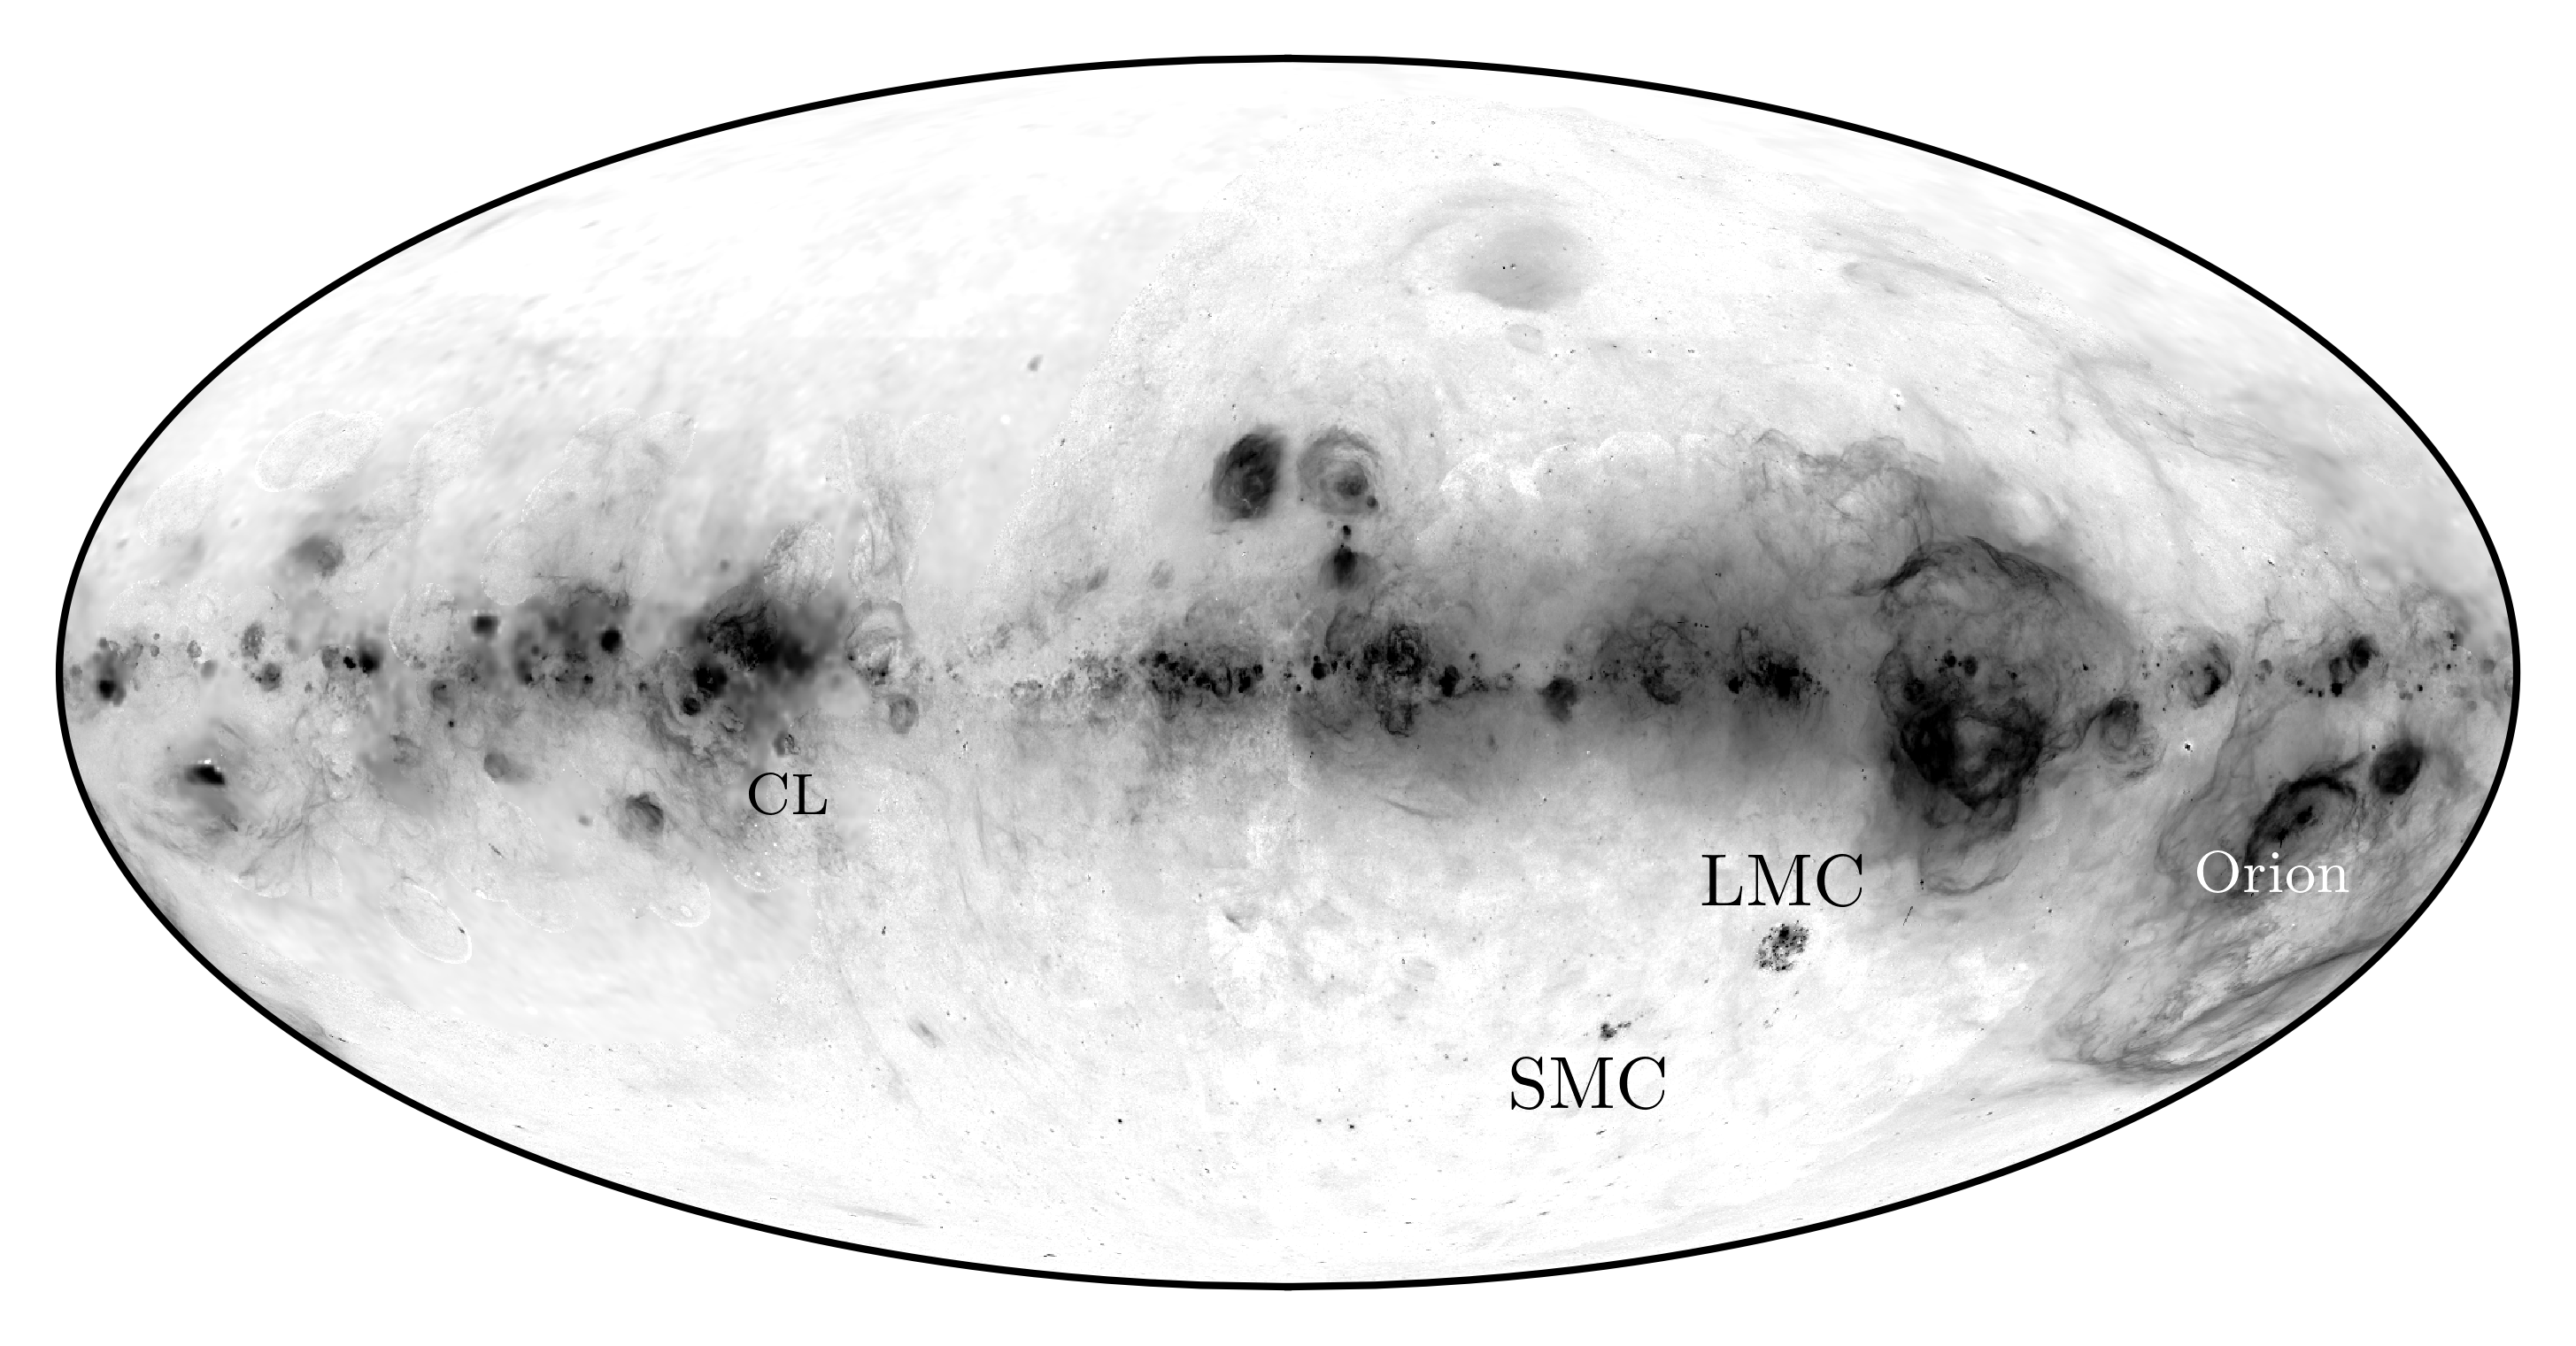

In [3]:
mapFile = 'Halpha_fwhm06_1024.fits'

# read the HEALPix format map

haMap = hp.read_map(mapFile)

# Make the plot

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

plt.axes(ax)
hp.mollview(haMap,min=0.5,max=200,norm='log',cmap='Greys',cbar=False,xsize=2048,
            title=None,hold=True)

hp.graticule(360,360,lw=0) # lw=0 tricks into drawing a border without meridians or parallels

# Annotate LMC, SMC, Orion, and Cygnus Loop (CL)

hp.projtext(280.46,-30.,'LMC',lonlat=True,ha='center',va='bottom',fontsize=10)
hp.projtext(302.81,-48.,'SMC',lonlat=True,ha='center',va='top',fontsize=10)
hp.projtext(209.0137,-21.38,'Orion',lonlat=True,color='white',ha='center',va='top',fontsize=8)
hp.projtext(74,-12,'CL',lonlat=True,ha='center',va='top',fontsize=8)

# show and make a hardcopy file

plt.plot()
plt.savefig(plotFile,bbox_inches='tight')